In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Strategy to make CC composite file

    Take chromosome 8 as example

In [4]:
name = "HG001_Cell_350"
chrom = "chr8"
config = json.load(open("../../4_NanoStrandSeq_Phasing/results/%s/prepare/config.json" % name))

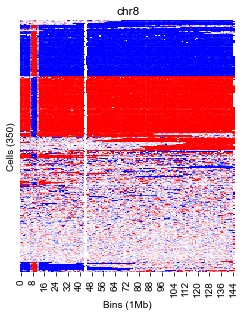

In [26]:
Mp = pd.read_csv("../../4_NanoStrandSeq_Phasing/results/%s/inversions.v2/regions/all_cc_regions.outdir/%s/matrix_of_crick_proportion.clustered.tsv" % (name, chrom), sep="\t", index_col=0)
plt.figure(figsize=(3.5, 4.5))
plt.title("%s" % chrom)
sns.heatmap(Mp, cmap="bwr", vmin=0, vmax=1, cbar=False)
plt.xlabel("Bins (1Mb)")
plt.ylabel("Cells (%d)" % len(Mp))
plt.yticks([])
plt.tight_layout()
plt.savefig("figures/heatmap_of_crick_proportion.clustered.pdf", dpi=300)

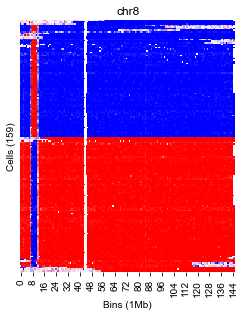

In [27]:
Mp = pd.read_csv("../../4_NanoStrandSeq_Phasing/results/%s/inversions.v2/regions/all_cc_regions.outdir/%s/matrix_of_crick_proportion.filtered.tsv" % (name, chrom), sep="\t", index_col=0)
plt.figure(figsize=(3.5, 4.5))
plt.title("%s" % chrom)
sns.heatmap(Mp, cmap="bwr", cbar=False)
plt.xlabel("Bins (1Mb)")
plt.ylabel("Cells (%d)"  % len(Mp))
plt.yticks([])
plt.tight_layout()
plt.savefig("figures/heatmap_of_crick_proportion.filtered.pdf", dpi=300)

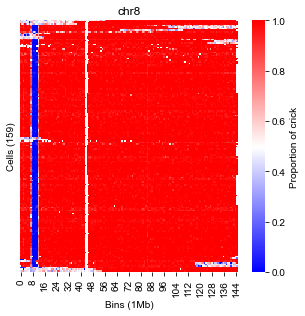

In [28]:
Mp = pd.read_csv("../../4_NanoStrandSeq_Phasing/results/%s/inversions.v2/regions/all_cc_regions.outdir/%s/matrix_of_crick_proportion.reversed.tsv" % (name, chrom), sep="\t", index_col=0)
plt.figure(figsize=(4.4, 4.5))
plt.title("%s" % chrom)
sns.heatmap(Mp, cmap="bwr", cbar_kws={"label": "Proportion of crick"})
plt.xlabel("Bins (1Mb)")
plt.ylabel("Cells (%d)"  % len(Mp))
plt.yticks([])
plt.tight_layout()
plt.savefig("figures/heatmap_of_crick_proportion.reversed.pdf", dpi=300)

15


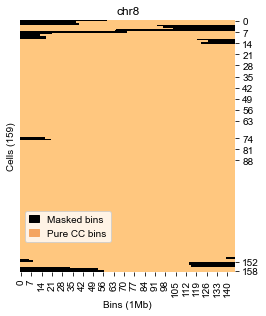

In [29]:
# select to show barplot
indexes = np.array([0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 74, 81, 88, 152, 158])
print(len(indexes))
        
Mm = pd.read_csv("../../4_NanoStrandSeq_Phasing/results/%s/inversions.v2/regions/all_cc_regions.outdir/%s/matrix_of_masked.tsv" % (name, chrom), sep="\t", index_col=0)

plt.figure(figsize=(3.8, 4.5))
plt.title("%s" % chrom)
sns.heatmap(Mm, cmap="copper", cbar=None)
plt.xlabel("Bins (1Mb)")
plt.ylabel("Cells (%d)" % len(Mm))
plt.yticks(np.array(indexes) + 0.5, list(map(str, indexes)))
plt.gca().yaxis.set_tick_params(which='major', rotation=0,
                         labelleft=False, labelright=True, left=False, right=True)

patch1 = mpatches.Patch(color="black", label="Masked bins")
patch2 = mpatches.Patch(color="sandybrown", label="Pure CC bins")
plt.legend(handles=[patch1, patch2], loc="lower left", ncol=1, bbox_to_anchor=(0, 0.1), handlelength=1)

plt.tight_layout()
plt.savefig("figures/heatmap_of_mask.pure_cc.pdf", dpi=300)

In [17]:
data = dict()
for cell in config["Cells"]:
    path = "../../4_NanoStrandSeq_Phasing/results/%s/prepare/stat_bin_reads/%s.RmDup1.tsv" % (name, cell)
    data[cell] = pd.read_csv(path, sep="\t")

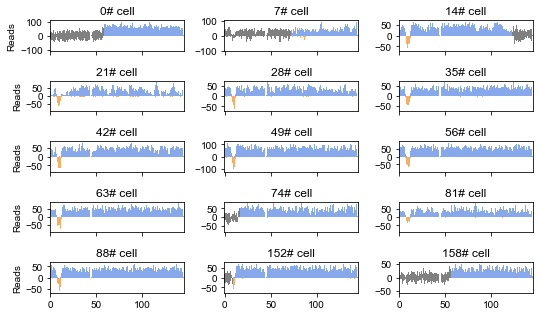

In [20]:
color_c = (135/255, 169/255, 235/255)
color_w = (248/255, 173/255, 97/255)

cells1 = [Mm.index.values[i] for i in indexes]
fig, axs = plt.subplots(5, 3, figsize=(7.6, 4.5), sharex=True)
for i, cell in enumerate(cells1):
    row_idx = int(i / 3)
    col_idx = i % 3
    plt.sca(axs[row_idx][col_idx])
    # plt.title("Cell index: %d" % indexes[i])
    plt.title("%d# cell" % indexes[i])
    
    d = data[cell]
    d = d[d["Chrom"] == chrom]
    counts1 = d["Crick"]
    counts2 = d["Watson"]
    
    counts1 = np.array(counts1)
    counts2 = np.array(counts2)
    if sum(counts1) < sum(counts2):
        counts1, counts2 = counts2, counts1
    xs = np.arange(len(counts1))
    colors1 = []
    colors2 = []
    for v in Mm.loc[cell]:
        if v == 0:
            colors1.append("grey")
            colors2.append("grey")
        else:
            colors1.append(color_c)
            colors2.append(color_w)
    plt.bar(xs, counts1, width=1, color=colors1)
    plt.bar(xs, -counts2, width=1, color=colors2)
    plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
    ylim = max(max(counts1), max(counts2)) * 1.1
    plt.ylim(-ylim, ylim)
    if row_idx == 5:
        plt.xlabel("Bins (1Mb)")
    if col_idx == 0:
        plt.ylabel("Reads")
        
plt.tight_layout()
plt.savefig("figures/masked_bins.barplot.pdf", dpi=300)

# Example: HOM and HET

In [167]:
path = "../1_NanoStrandseq/results/assembly/HG001_Cell_350/inversions.v2/composites/all_chroms.bed.gz"
chrom = "chr8"
start = 8000000
end = 12000000

regions = []
with pysam.TabixFile(path) as f:
    for line in f.fetch(chrom, start, end):
        row = line.strip("\n").split("\t")
        print(line)
        break

chr8	8008982	8015828	20220430_S5Merged.sc081	60	-	8008982	8015828	248,173,97


In [31]:
import gzip

In [33]:
invs = []
with gzip.open("../../4_NanoStrandSeq_Phasing/results/HG001_Cell_350/inversions.v2/inversions.bed.gz", "rt") as f:
    for line in f:
        row = line.strip("\n").split("\t")
        chrom, start, end, name = row[:4] 
        start = int(start)
        end = int(end)
        crick, watson, ratio = name.split(";")
        crick, watson, ratio = int(crick), int(watson), float(ratio)
        if crick + watson > 100:
            if ratio >= 0.3:
                invs.append([chrom, start, end, crick, watson, ratio])
        # print(line)
        # break
invs = list(sorted(invs, key=lambda inv: inv[2] - inv[1]))
len(invs)

289

In [34]:
with open("results/invs.bed", "w+") as fw:
    for inv in sorted(invs):
        chrom, start, end, crick, watson, ratio = inv
        name = "HOM" if ratio >= 0.75 else "HET"
        if name == "HET":
            c = "0,0,255"
        else:
            c = "0,245,255"
        line = "\t".join(map(str, [chrom, start, end, name, ".", "+", start, end, c]))
        fw.write(line + "\n")